 <h1>REGRESSIONS  AND TIME SERIES PROJECT</h1> 

In this project we will be working with a fake absenteeism at work data set, indicating whether or not a particular employee will 'Hit target'. We will try to create a model that will predict whether or not they will miss work based off the features of that employee.

This data set contains the following features:
* Reason for absence                 
* Month of absence                   
* Day of the week                    
* Seasons                            
* Transportation expense             
* Distance from Residence to Work    
* Service time                       
* Age                                
* Work load Average/day              
* Hit target                         
* Disciplinary failure               
* Education                          
* Son                                
* Social drinker                     
* Social smoker                      
* Pet                                
* Weight                             
* Height                             
* Body mass index                    
* Absenteeism time in hours 


## Import Libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import sys
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [94]:
df = pd.read_csv('../../data/01_raw/Absenteeism_at_work.csv', delimiter=';')

In [180]:
df.head(10)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Body_mass_index,Absenteeism_time_in_hours,medical_consult_dummy,dental_consult_dummy,genitourinary_dummy,mon_dummy,tue_dummy,wed_dummy,thu_dummy,fri_dummy
0,11,26,7,3,1,289,36,13,33,239.554,...,30,4,0,0,0,0,1,0,0,0
1,36,0,7,3,1,118,13,18,50,239.554,...,31,0,0,0,0,0,1,0,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,31,2,1,0,0,0,0,1,0,0
3,7,7,7,5,1,279,5,14,39,239.554,...,24,4,0,0,0,0,0,0,1,0
4,11,23,7,5,1,289,36,13,33,239.554,...,30,2,1,0,0,0,0,0,1,0
5,3,23,7,6,1,179,51,18,38,239.554,...,31,2,1,0,0,0,0,0,0,1
6,10,22,7,6,1,361,52,3,28,239.554,...,27,8,0,0,0,0,0,0,0,1
7,20,23,7,6,1,260,50,11,36,239.554,...,23,4,1,0,0,0,0,0,0,1
8,14,19,7,2,1,155,12,14,34,239.554,...,25,40,0,0,0,1,0,0,0,0
9,1,22,7,2,1,235,11,14,37,239.554,...,29,8,0,0,0,1,0,0,0,0


In [95]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [96]:
df.shape

(740, 21)

In [97]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Exploratory Data Analysis

* For the rest of the exercise we'll only be using the numerical data of the csv file.
**Use seaborn to create a jointplot to compare the Number children an employee has and the Absenteeism time in hours columns. Does the correlation make sense?**


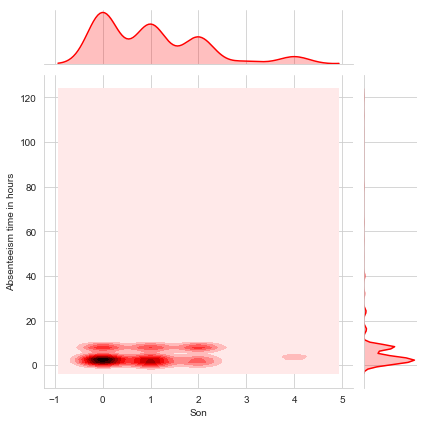

In [98]:
sns.jointplot(x='Son', y='Absenteeism time in hours', data=df, color='red', kind='kde')

In [99]:
#sns.jointplot(x='Transportation expense', y='Hit target', data=df, color='red', kind='kde')

# Creating a countplot for the group age of employees

Text(0.5, 0, 'Age')

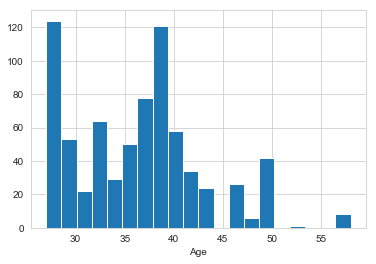

In [100]:
sns.set_style('whitegrid')
df['Age'].hist(bins=20)
plt.xlabel('Age')

In [101]:
#sns.pairplot(df,hue='Disciplinary failure',palette='bwr')

In [102]:
#plt.show()

In [103]:
#sns.jointplot(x='Service time',y='Hit target',data=df)

# Creating a count plot for the reasons of absence

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

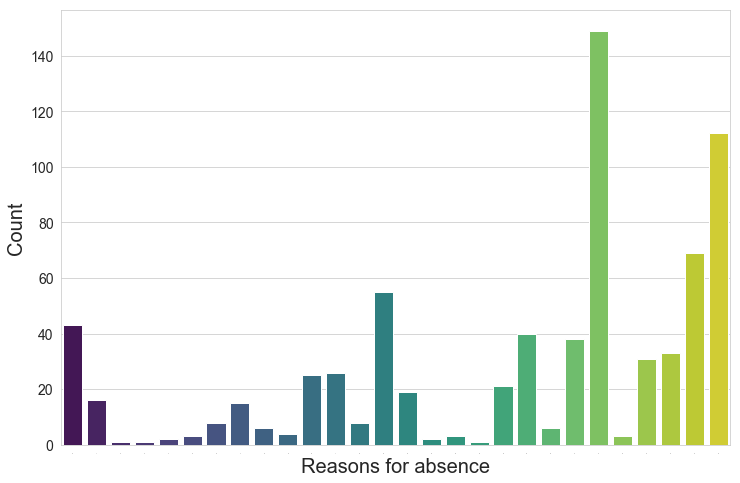

In [104]:
plt.figure(figsize=(12,8))
sns.countplot(x='Reason for absence',data=df,palette='viridis')
plt.xlabel('Reasons for absence', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

## Interpretation of some reasons of absence
* medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28)



# Creating new features

In [105]:
# df['Month'] = pd.to_datetime(df['Month of absence'])
# df['Day of Week'] = pd.to_datetime(df['Day of Week'])

In [106]:
#df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
# df['Month'] = df['Month of absence'].apply(lambda time: time.month)
# df['Day of Week'] = df['Day of the week'].apply(lambda time: time.dayofweek)

In [107]:
#dmap = {1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri'}

In [108]:
#df['Day of the week'] = df['Day of the week'].map(dmap)

In [109]:
#dmap = {1:'summer',2:'autumn',3:'winter',4:'spring'}

In [110]:
#df['Absenteeism time in hours '] = pd.to_numeric(df['Absenteeism time in hours'])

In [111]:
#df['Seasons'] = df['Seasons'].map(dmap)

In [112]:
df['medical_consult_dummy'] = (df['Reason for absence'] == 23).astype(int)
df['dental_consult_dummy'] = (df['Reason for absence'] == 28).astype(int)
df['genitourinary_dummy'] = (df['Reason for absence'] == 14).astype(int)
dow = pd.get_dummies(df['Day of the week'])
dow.columns = ['mon_dummy', 'tue_dummy', 'wed_dummy', 'thu_dummy' ,'fri_dummy']
df = pd.concat([df, dow], axis=1)
print(df.shape)

(740, 29)


In [113]:
df.columns = df.columns.str.replace(' ', '_')  # remove spaces from column titles

#### Dropping rows where Absenteeism time in hours is equal or greater than 24

In [114]:
df1 = df[df['Absenteeism_time_in_hours'] < 24]
#df1.fillna(value=0, inplace=True)
df.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
medical_consult_dummy              0
dental_consult_dummy               0
genitourinary_dummy                0
mon_dummy                          0
tue_dummy                          0
wed_dummy                          0
t

In [115]:
#df1.groupby('ID')['Absenteeism_time_in_hours']

In [116]:
print(df1.shape)

(696, 29)


In [117]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

## Train-test-split

In [118]:
# removed 3 variables: the target, "reason" and "day of week" (both of which we dummied)
# removed 3 more vars: 'tue_dummy' (for collinearity issues), 'Weight', 'Height' (also for collinearity issues)
X = df1[['Month_of_absence','Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Body_mass_index', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 
       'wed_dummy', 'thu_dummy', 'fri_dummy']]

In [119]:
y = df1['Absenteeism_time_in_hours']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Split `X_train` into `X_train_dummy` (for categorical variables) and `X_train_cont` (for continuous variables)

In [121]:
X_train = X_train.reset_index(drop=True)  # reset index so .concat() words
X_train.shape

(487, 22)

In [122]:
# 'tue_dummy', 
X_train_dummy = X_train[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_train_dummy.shape

(487, 15)

In [123]:
# 'Weight', 'Height',
X_train_cont = X_train[['Transportation_expense','Distance_from_Residence_to_Work', 
                        'Service_time', 'Age','Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_train_cont.shape

(487, 7)

#### Split `X_test` into `X_test_dummy` (for categorical variables) and `X_test_cont` (for continuous variables)

In [124]:
X_test = X_test.reset_index(drop=True)  # reset index so .concat() works
X_test.shape

(209, 22)

In [125]:
# 'tue_dummy', 
X_test_dummy = X_test[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_test_dummy.shape

(209, 15)

In [126]:
# 'Weight', 'Height', 
X_test_cont = X_test[['Transportation_expense','Distance_from_Residence_to_Work', 'Service_time', 'Age',
                      'Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_test_cont.shape

(209, 7)

#### Scale `X_train_cont` and `X_test_cont`

In [127]:
scaler = StandardScaler()

In [128]:
# fit and transform training data
scaler.fit(X_train_cont)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
# just transform the testing data
X_test_cont_scaled = scaler.transform(X_test_cont)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Combine `X_train_dummy` and `X_train_cont_scaled`

In [130]:
print(X_train_cont_scaled.shape)
print(X_train_dummy.shape)

(487, 7)
(487, 15)


In [131]:
X_train_scaled = pd.concat([X_train_dummy, X_train_cont_scaled], axis=1)
X_train_scaled.shape

(487, 22)

#### Combine `X_test_dummy` and `X_test_cont_scaled`

In [132]:
print(X_test_cont_scaled.shape)
print(X_test_dummy.shape)

(209, 7)
(209, 15)


In [133]:
X_test_scaled = pd.concat([X_test_dummy, X_test_cont_scaled], axis=1)
X_test_scaled.shape

(209, 22)

## Linear Regression

Using `X_train_scaled` and `X_test_scaled`

In [134]:
X_train_scaled.shape

(487, 22)

In [135]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

In [136]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.9223432512429963

In [137]:
r2_score(y_test, y_pred)

0.24857047236150986

#### Look at AIC/BIC using `statsmodels`

In [138]:
est = sm.OLS(list(y_train), X_train_scaled).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     54.58
Date:                Tue, 30 Jul 2019   Prob (F-statistic):          8.85e-114
Time:                        15:26:07   Log-Likelihood:                -1219.2
No. Observations:                 487   AIC:                             2482.
Df Residuals:                     465   BIC:                             2575.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Month_of_absence                    0.1628      0.052      3.102      0.002       0.060       0.266
Seasons                             0.2073      0.139      1.493      0.136      -0.065       0.480
Disciplinary_failure               -6.5533      0.635    -10.322      0.000      -7.801      -5.306
medical_consult_dummy              -2.3240      0.368     -6.313      0.000      -3.047      -1.601
dental_consult_dummy               -2.7981      0.425     -6.587      0.000      -3.633      -1.963
genitourinary_dummy                -0.5093      0.896     -0.568      0.570      -2.270       1.252
mon_dummy                           1.2598      0.421      2.995      0.003       0.433       2.086
wed_dummy                           1.0539      0.416      2.531      0.012       0.235       1.872
thu_dummy                           1.0140      0.437      2.322      0.021       0.156       1.872
fri_dummy                           0.2920      0.437      0.669      0.504      -0.566       1.150
Social_drinker                      2.0844      0.341      6.109      0.000       1.414       2.755
Social_smoker                       0.8601      0.576      1.494      0.136      -0.271       1.991
Education                           1.1592      0.195      5.937      0.000       0.776       1.543
Son                                 0.5846      0.141      4.147      0.000       0.308       0.862
Pet                                -0.1054      0.124     -0.848      0.397      -0.350       0.139
Transportation_expense              0.5116      0.172      2.967      0.003       0.173       0.850
Distance_from_Residence_to_Work    -0.4633      0.193     -2.396      0.017      -0.843      -0.083
Service_time                       -0.3253      0.256     -1.269      0.205      -0.829       0.178
Age                                -0.2969      0.216     -1.375      0.170      -0.721       0.127
Work_load_Average/day_              0.3328      0.151      2.197      0.029       0.035       0.630
Hit_target                         -0.1233      0.163     -0.756      0.450      -0.444       0.197
Body_mass_index                     0.4720      0.197      2.390      0.017       0.084       0.860
==============================================================================
Omnibus:                      106.048   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.578
Skew:                           1.107   Prob(JB):                     1.42e-55
Kurtosis:                       5.746   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression w/ RFE

Recursive feature elimination

Using `X_train_scaled` and `y_train` to choose the top 15 most important features

In [139]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(X_train_scaled, y_train)

In [140]:
top_15_cols = X.columns[selector.support_]
X_train_scaled_t15 = X_train_scaled[top_15_cols]
X_test_scaled_t15 = X_test_scaled[top_15_cols]
X_test_scaled_t15.columns

Index(['Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Education', 'Son', 'Social_drinker', 'Pet',
       'Body_mass_index', 'medical_consult_dummy', 'dental_consult_dummy',
       'genitourinary_dummy', 'mon_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

In [141]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled_t15, y_train)
y_pred = linreg.predict(X_test_scaled_t15)

In [142]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.227637465701872

In [143]:
r2_score(y_test, y_pred)

0.08336739479390298

#### Look at AIC/BIC using `statsmodels`

In [144]:
est = sm.OLS(list(y_train), X_train_scaled_t15).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     56.37
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           5.50e-95
Time:                        15:26:09   Log-Likelihood:                -1280.0
No. Observations:                 487   AIC:                             2590.
Df Residuals:                     472   BIC:                             2653.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation_expense              0.3998      0.191      2.089      0.037       0.024       0.776
Distance_from_Residence_to_Work    -0.4488      0.211     -2.127      0.034      -0.863      -0.034
Service_time                       -0.1383      0.277     -0.500      0.618      -0.682       0.406
Age                                -0.5204      0.240     -2.172      0.030      -0.991      -0.050
Education                           1.6162      0.180      8.987      0.000       1.263       1.970
Son                                 0.6856      0.153      4.469      0.000       0.384       0.987
Social_drinker                      2.3893      0.368      6.492      0.000       1.666       3.112
Pet                                 0.0540      0.135      0.401      0.688      -0.210       0.318
Body_mass_index                     0.3478      0.206      1.691      0.091      -0.056       0.752
medical_consult_dummy              -1.2159      0.382     -3.186      0.002      -1.966      -0.466
dental_consult_dummy               -1.7547      0.454     -3.867      0.000      -2.646      -0.863
genitourinary_dummy                 0.9955      0.993      1.003      0.316      -0.955       2.946
mon_dummy                           1.3244      0.416      3.187      0.002       0.508       2.141
thu_dummy                           0.5983      0.441      1.356      0.176      -0.269       1.465
fri_dummy                           0.1250      0.429      0.292      0.771      -0.718       0.968
==============================================================================
Omnibus:                       56.909   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.976
Skew:                           0.766   Prob(JB):                     4.78e-20
Kurtosis:                       4.428   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lasso Regularization

In [145]:
from sklearn.linear_model import LassoCV, Ridge

lasso = LassoCV(eps=0.001)
lasso.fit(X_train_scaled, y_train)
print('Training r^2:', lasso.score(X_train_scaled, y_train))
print('Testing r^2:', lasso.score(X_test_scaled, y_test))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled))))

Training r^2: 0.37196469460914505
Testing r^2: 0.2536657949145882
Training RMSE: 2.7500195599991333
Testing RMSE: 2.9124184286062373


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


## K-folds cross validation

In [146]:
linreg = LinearRegression()
model1 = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
# scores.append(model1.score(X_test, y_test))
np.mean(cross_val_score(linreg, X, y, cv=10))

0.20184050151872263

In [147]:
linreg = LinearRegression()
model1 = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
# scores.append(model1.score(X_test, y_test))
np.mean(np.sqrt(np.negative(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))))

2.9352619482640274

## Time series analysis

In [148]:
df1.shape

(696, 29)

In [149]:
df1.Month_of_absence

0      7
1      7
2      7
3      7
4      7
5      7
6      7
7      7
9      7
10     7
11     7
12     7
13     7
14     7
15     7
16     7
17     7
18     7
19     8
20     8
21     8
23     8
24     8
25     8
26     8
27     8
28     8
29     8
30     8
31     8
      ..
707    6
708    6
709    6
710    6
712    6
713    6
714    6
715    6
716    6
717    6
718    6
719    6
720    6
721    6
722    6
723    6
724    6
725    7
726    7
727    7
728    7
730    7
731    7
732    7
733    7
735    7
736    7
737    0
738    0
739    0
Name: Month_of_absence, Length: 696, dtype: int64

In [150]:
df1.Absenteeism_time_in_hours

0       4
1       0
2       2
3       4
4       2
5       2
6       8
7       4
9       8
10      8
11      8
12      8
13      1
14      4
15      8
16      2
17      8
18      8
19      2
20      8
21      1
23      4
24      8
25      7
26      1
27      4
28      8
29      2
30      8
31      8
       ..
707     3
708     8
709     8
710     8
712     8
713     2
714     0
715     0
716     3
717     2
718     2
719     3
720     3
721     8
722     2
723     3
724     3
725     4
726     2
727     8
728     4
730    16
731     2
732     8
733     8
735     8
736     4
737     0
738     0
739     0
Name: Absenteeism_time_in_hours, Length: 696, dtype: int64

#### More data cleaning

In [151]:
df1 = df1[df1.Month_of_absence != 0]  # drop rows where month is 
dmap = {2:'mon', 3:'tue', 4:'wed', 5:'thu', 6:'fri'}
df1['dow_label'] = df1.Day_of_the_week.map(dmap)

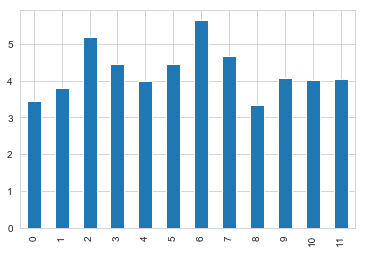

In [152]:
monthly_absent = df1.groupby('Month_of_absence')['Absenteeism_time_in_hours'].mean().reset_index()#.plot(kind='bar')
monthly_absent.columns = ['month', 'avg_hr_absent']
monthly_absent.avg_hr_absent.plot(kind='bar')#head()

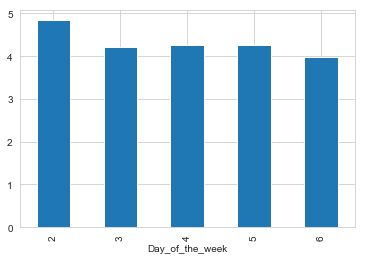

In [153]:
# dow_all = df1[['Day_of_the_week', 'Absenteeism_time_in_hours']]
dow_all = df1.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].mean()#.reset_index()#.plot(kind='bar')
dow_all.plot(kind='bar')#head()

In [184]:
df_id_all = df1.groupby(['Month_of_absence', 'Day_of_the_week', 'dow_label'])['Absenteeism_time_in_hours'].mean().reset_index()#.mean()
# dow_id_all = dow_id_all.drop('Day_of_the_week', axis=1)
print(df_id_all.shape)
df_id_all.head(1)

(60, 4)


,Month_of_absence,Day_of_the_week,dow_label,Absenteeism_time_in_hours
0,1,2,mon,92.9


<Figure size 432x288 with 0 Axes>

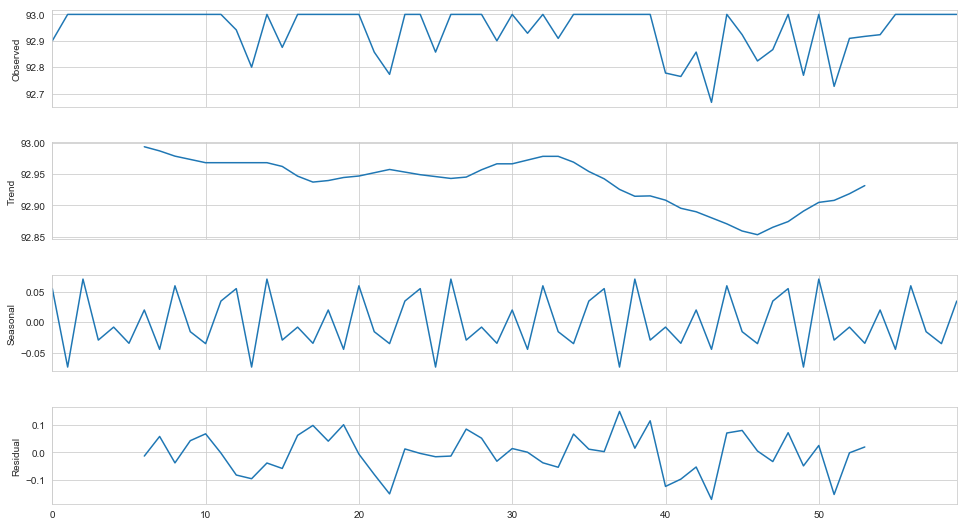

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_id_all['Absenteeism_time_in_hours'], freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [154]:
dow_id_all = df1.groupby(['ID', 'Day_of_the_week', 'dow_label'])['Absenteeism_time_in_hours'].sum().reset_index()#.mean()
# dow_id_all = dow_id_all.drop('Day_of_the_week', axis=1)
print(dow_id_all.shape)
dow_id_all.head(10)

(139, 4)


,ID,Day_of_the_week,dow_label,Absenteeism_time_in_hours
0,1,2,mon,39
1,1,3,tue,22
2,1,4,wed,9
3,1,5,thu,24
4,1,6,fri,27
5,2,2,mon,9
6,2,5,thu,8
7,2,6,fri,8
8,3,2,mon,107
9,3,3,tue,54


In [155]:
len(dow_id_all.ID.unique())

34

In [156]:
df_base = pd.DataFrame({'ID':np.repeat(dow_id_all.ID.unique(), 5), 'Day_of_the_week':np.array(list(range(2,7)) * 34)})
df_merge = pd.merge(df_base, dow_id_all, how='left', on=['ID', 'Day_of_the_week']).fillna(0)

In [157]:
print(df_base.shape)
print(df_merge.shape)

(170, 2)
(170, 4)


In [210]:
xticks_minor = [5, 10, 15,20,25,30,35,40,45,50,55,60]

''

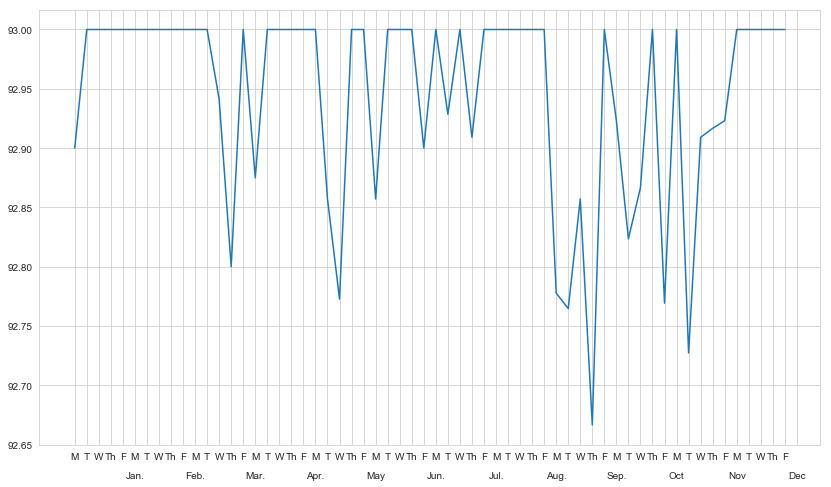

In [211]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(df_id_all.index, df_id_all.Absenteeism_time_in_hours)
# ax.set_xlabel('Month_day_of_the_week')
ax.set_xticks(range(0,61))
ax.set_xticklabels(np.array(['M', 'T', 'W', 'Th', 'F'] * 12))
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(np.array(['\n\nJan.', '\n\nFeb.', '\n\nMar.', '\n\nApr.', '\n\nMay', '\n\nJun.', '\n\nJul.', '\n\nAug.', '\n\nSep.', '\n\nOct', '\n\nNov', '\n\nDec'] * 12), minor=True )


;

In [189]:
list(range(2,7)) * 34

range(0, 61)

## Logistic regression

In [ ]:
# Group by month/day and take the average

In [160]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,693.0,18.025974,11.095847,1.000,9.000,18.000,28.000,36.000
Reason_for_absence,693.0,19.683983,8.378147,0.000,13.000,23.000,27.000,28.000
Month_of_absence,693.0,6.337662,3.429510,1.000,3.000,6.000,9.000,12.000
Day_of_the_week,693.0,3.956710,1.421705,2.000,3.000,4.000,5.000,6.000
Seasons,693.0,2.536797,1.116295,1.000,2.000,3.000,4.000,4.000
Transportation_expense,693.0,221.600289,66.421651,118.000,179.000,225.000,260.000,388.000
Distance_from_Residence_to_Work,693.0,29.874459,14.875693,5.000,16.000,26.000,50.000,52.000
Service_time,693.0,12.493506,4.437951,1.000,9.000,12.000,16.000,29.000
Age,693.0,36.326118,6.405640,27.000,31.000,37.000,40.000,58.000
Work_load_Average/day_,693.0,270.577130,38.438426,205.917,244.387,264.249,284.853,378.884


** Diciplinary faillure is our target for the logistic regression **

In [167]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy', 'dow_label', 'target_dummy'],
      dtype='object')

In [174]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(C=1e9, solver='lbfgs')
# feature_cols = ['Absenteeism_time_in_hours']
# X = df1[feature_cols]
# y = df1['Hit_target']
# logreg.fit(X, y)
# df1['Absenteeism_time_in_hours'] = logreg.predict(X)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [178]:
# plt.scatter(X, y)
# #plt.plot(X, y, color='red')
# plt.xlabel('Absenteeism_time_in_hours')
# plt.ylabel('Hit_target')

In [162]:
df1['target_dummy'] = (df1['Hit_target'] > 98).astype(int)

In [163]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy', 'dow_label', 'target_dummy'],
      dtype='object')

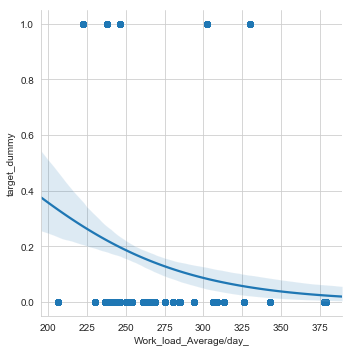

In [164]:
sns.lmplot(x='Work_load_Average/day_', y='target_dummy', data=df1, logistic=True)

In [ ]:
df1['forecast'] = res.predict(start=54, end=72, dynamic=False)
monthly_sales[['payment_amount', 'forecast']].plot(figsize=(16, 12))